In [63]:
import tensorflow as tf

import pandas as pd
from IPython.display import display, HTML

from srcnn.dataset import parse_function, prepare_input_image, prepare_output_image
from srcnn.plot import plot_dataset, plot_predictions

import calendar
import time
import os
import glob

In [64]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(kernel_size=(9, 9), filters=64, activation='relu'),
  tf.keras.layers.Conv2D(kernel_size=(1, 1), filters=32, activation='relu'),
  tf.keras.layers.Conv2D(kernel_size=(5, 5), filters=3)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

<_UnbatchDataset shapes: ((32, 32, 3), (20, 20, 3)), types: (tf.float32, tf.float32)>


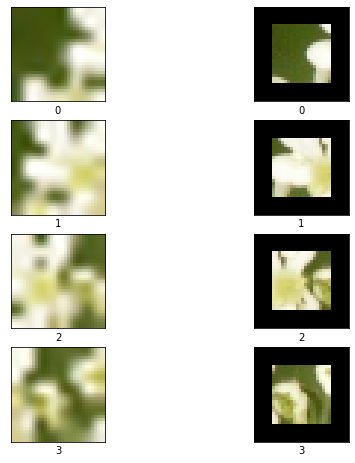

In [65]:
dataset = tf.data.Dataset.list_files("datasets/Train/*.bmp")
dataset = dataset.flat_map(lambda f: parse_function(f, input_size=32, output_size=20, stride=14, scale=4)).unbatch()
print(dataset)
plot_dataset(dataset, n_patches=4)
    
batched_dataset = dataset.shuffle(1000).batch(100).repeat()

In [6]:
run_id=calendar.timegm(time.gmtime())
log_dir=f"logs/{run_id}/"
print(log_dir)
model.fit(batched_dataset, epochs=3000, steps_per_epoch=100, callbacks=[tf.keras.callbacks.TensorBoard(log_dir=log_dir)])

logs/1568893067/
Train for 100 steps
Epoch 1/3000
100/100 [==============================] - 8s 79ms/step - loss: 0.0134 - accuracy: 0.8439
Epoch 2/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0042 - accuracy: 0.9351
Epoch 3/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0045 - accuracy: 0.9137
Epoch 4/3000
100/100 [==============================] - 7s 75ms/step - loss: 0.0036 - accuracy: 0.9536
Epoch 5/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0058 - accuracy: 0.9290
Epoch 6/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0035 - accuracy: 0.9521
Epoch 7/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0035 - accuracy: 0.9483
Epoch 8/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0044 - accuracy: 0.9307
Epoch 9/3000
100/100 [==============================] - 7s 71ms/step - loss: 0.0039 - accuracy: 0.9356
Epoch 10/3000
100/100 [=============

100/100 [==============================] - 7s 71ms/step - loss: 0.0035 - accuracy: 0.9694
Epoch 151/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0037 - accuracy: 0.9458
Epoch 152/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0034 - accuracy: 0.9520
Epoch 153/3000
100/100 [==============================] - 7s 71ms/step - loss: 0.0042 - accuracy: 0.9436
Epoch 154/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0038 - accuracy: 0.9341
Epoch 155/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0041 - accuracy: 0.9535
Epoch 156/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0033 - accuracy: 0.9501
Epoch 157/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0033 - accuracy: 0.9532
Epoch 158/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0042 - accuracy: 0.9564
Epoch 159/3000
100/100 [==============================] - 7s 69ms/step

100/100 [==============================] - 7s 70ms/step - loss: 0.0034 - accuracy: 0.9517
Epoch 307/3000
100/100 [==============================] - 7s 68ms/step - loss: 0.0034 - accuracy: 0.9626
Epoch 308/3000
100/100 [==============================] - 7s 68ms/step - loss: 0.0034 - accuracy: 0.9553
Epoch 309/3000
100/100 [==============================] - 7s 68ms/step - loss: 0.0040 - accuracy: 0.9461
Epoch 310/3000
100/100 [==============================] - 7s 68ms/step - loss: 0.0037 - accuracy: 0.9561
Epoch 311/3000
100/100 [==============================] - 7s 68ms/step - loss: 0.0028 - accuracy: 0.9580
Epoch 312/3000
100/100 [==============================] - 7s 68ms/step - loss: 0.0040 - accuracy: 0.9669
Epoch 313/3000
100/100 [==============================] - 7s 68ms/step - loss: 0.0046 - accuracy: 0.9310
Epoch 314/3000
100/100 [==============================] - 7s 68ms/step - loss: 0.0030 - accuracy: 0.9566
Epoch 315/3000
100/100 [==============================] - 7s 68ms/step

100/100 [==============================] - 7s 74ms/step - loss: 0.0040 - accuracy: 0.9582
Epoch 576/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0034 - accuracy: 0.9658
Epoch 577/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0036 - accuracy: 0.9522
Epoch 578/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0036 - accuracy: 0.9517
Epoch 579/3000
100/100 [==============================] - 7s 74ms/step - loss: 0.0038 - accuracy: 0.9464
Epoch 580/3000
100/100 [==============================] - 7s 71ms/step - loss: 0.0034 - accuracy: 0.9519
Epoch 581/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0024 - accuracy: 0.9664
Epoch 582/3000
100/100 [==============================] - 8s 78ms/step - loss: 0.0046 - accuracy: 0.9437
Epoch 583/3000
100/100 [==============================] - 7s 74ms/step - loss: 0.0039 - accuracy: 0.9461
Epoch 584/3000
100/100 [==============================] - 8s 83ms/step

Epoch 653/3000
100/100 [==============================] - 7s 71ms/step - loss: 0.0024 - accuracy: 0.9734
Epoch 654/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0049 - accuracy: 0.9384
Epoch 655/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0029 - accuracy: 0.9442
Epoch 656/3000
100/100 [==============================] - 7s 75ms/step - loss: 0.0038 - accuracy: 0.9594
Epoch 657/3000
100/100 [==============================] - 7s 71ms/step - loss: 0.0042 - accuracy: 0.9534
Epoch 658/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0028 - accuracy: 0.9525
Epoch 659/3000
100/100 [==============================] - 7s 71ms/step - loss: 0.0044 - accuracy: 0.9558
Epoch 660/3000
100/100 [==============================] - 7s 74ms/step - loss: 0.0027 - accuracy: 0.9587
Epoch 661/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0039 - accuracy: 0.9501
Epoch 662/3000
100/100 [==============================]

100/100 [==============================] - 8s 78ms/step - loss: 0.0036 - accuracy: 0.9564
Epoch 732/3000
100/100 [==============================] - 7s 74ms/step - loss: 0.0030 - accuracy: 0.9450
Epoch 733/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0039 - accuracy: 0.9649
Epoch 734/3000
100/100 [==============================] - 7s 71ms/step - loss: 0.0033 - accuracy: 0.9324
Epoch 735/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0037 - accuracy: 0.9642
Epoch 736/3000
100/100 [==============================] - 8s 75ms/step - loss: 0.0037 - accuracy: 0.9579
Epoch 737/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0040 - accuracy: 0.9522
Epoch 738/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0033 - accuracy: 0.9527
Epoch 739/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0033 - accuracy: 0.9488
Epoch 740/3000
100/100 [==============================] - 7s 73ms/step

100/100 [==============================] - 9s 90ms/step - loss: 0.0037 - accuracy: 0.9602
Epoch 888/3000
100/100 [==============================] - 9s 87ms/step - loss: 0.0041 - accuracy: 0.9580
Epoch 889/3000
100/100 [==============================] - 9s 95ms/step - loss: 0.0034 - accuracy: 0.9428
Epoch 890/3000
100/100 [==============================] - 9s 92ms/step - loss: 0.0032 - accuracy: 0.9556
Epoch 891/3000
100/100 [==============================] - 9s 91ms/step - loss: 0.0038 - accuracy: 0.9578
Epoch 892/3000
100/100 [==============================] - 9s 87ms/step - loss: 0.0033 - accuracy: 0.9648
Epoch 893/3000
100/100 [==============================] - 9s 91ms/step - loss: 0.0034 - accuracy: 0.9433
Epoch 894/3000
100/100 [==============================] - 10s 98ms/step - loss: 0.0039 - accuracy: 0.9632
Epoch 895/3000
100/100 [==============================] - 9s 89ms/step - loss: 0.0031 - accuracy: 0.9606
Epoch 896/3000
100/100 [==============================] - 9s 93ms/ste

100/100 [==============================] - 8s 78ms/step - loss: 0.0031 - accuracy: 0.9697
Epoch 1042/3000
100/100 [==============================] - 8s 83ms/step - loss: 0.0035 - accuracy: 0.9598
Epoch 1043/3000
100/100 [==============================] - 8s 80ms/step - loss: 0.0045 - accuracy: 0.9458
Epoch 1044/3000
100/100 [==============================] - 8s 75ms/step - loss: 0.0029 - accuracy: 0.9635
Epoch 1045/3000
100/100 [==============================] - 8s 80ms/step - loss: 0.0036 - accuracy: 0.9607
Epoch 1046/3000
100/100 [==============================] - 8s 76ms/step - loss: 0.0034 - accuracy: 0.9531
Epoch 1047/3000
100/100 [==============================] - 8s 76ms/step - loss: 0.0032 - accuracy: 0.9506
Epoch 1048/3000
100/100 [==============================] - 8s 79ms/step - loss: 0.0037 - accuracy: 0.9627
Epoch 1049/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0033 - accuracy: 0.9493
Epoch 1050/3000
100/100 [==============================] - 7s 

100/100 [==============================] - 9s 94ms/step - loss: 0.0040 - accuracy: 0.9588
Epoch 1195/3000
100/100 [==============================] - 11s 110ms/step - loss: 0.0032 - accuracy: 0.9514
Epoch 1196/3000
100/100 [==============================] - 9s 93ms/step - loss: 0.0030 - accuracy: 0.9507
Epoch 1197/3000
100/100 [==============================] - 10s 103ms/step - loss: 0.0035 - accuracy: 0.9669
Epoch 1198/3000
100/100 [==============================] - 10s 102ms/step - loss: 0.0047 - accuracy: 0.9511
Epoch 1199/3000
100/100 [==============================] - 9s 93ms/step - loss: 0.0027 - accuracy: 0.9569
Epoch 1200/3000
100/100 [==============================] - 10s 102ms/step - loss: 0.0036 - accuracy: 0.9521
Epoch 1201/3000
100/100 [==============================] - 10s 101ms/step - loss: 0.0034 - accuracy: 0.9578
Epoch 1202/3000
100/100 [==============================] - 10s 100ms/step - loss: 0.0037 - accuracy: 0.9598
Epoch 1203/3000
100/100 [=========================

100/100 [==============================] - 8s 83ms/step - loss: 0.0033 - accuracy: 0.9456
Epoch 1349/3000
100/100 [==============================] - 8s 81ms/step - loss: 0.0037 - accuracy: 0.9632
Epoch 1350/3000
100/100 [==============================] - 8s 82ms/step - loss: 0.0039 - accuracy: 0.9486
Epoch 1351/3000
100/100 [==============================] - 9s 95ms/step - loss: 0.0031 - accuracy: 0.9635
Epoch 1352/3000
100/100 [==============================] - 8s 83ms/step - loss: 0.0043 - accuracy: 0.9513
Epoch 1353/3000
100/100 [==============================] - 9s 87ms/step - loss: 0.0028 - accuracy: 0.9669
Epoch 1354/3000
100/100 [==============================] - 8s 82ms/step - loss: 0.0030 - accuracy: 0.9494
Epoch 1355/3000
100/100 [==============================] - 8s 81ms/step - loss: 0.0041 - accuracy: 0.9442
Epoch 1356/3000
100/100 [==============================] - 8s 79ms/step - loss: 0.0030 - accuracy: 0.9682
Epoch 1357/3000
100/100 [==============================] - 8s 

100/100 [==============================] - 7s 72ms/step - loss: 0.0035 - accuracy: 0.9638
Epoch 1503/3000
100/100 [==============================] - 7s 71ms/step - loss: 0.0030 - accuracy: 0.9490
Epoch 1504/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0035 - accuracy: 0.9526
Epoch 1505/3000
100/100 [==============================] - 8s 75ms/step - loss: 0.0034 - accuracy: 0.9569
Epoch 1506/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0028 - accuracy: 0.9627
Epoch 1507/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0040 - accuracy: 0.9407
Epoch 1508/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0038 - accuracy: 0.9651
Epoch 1509/3000
100/100 [==============================] - 7s 71ms/step - loss: 0.0034 - accuracy: 0.9672
Epoch 1510/3000
100/100 [==============================] - 7s 74ms/step - loss: 0.0032 - accuracy: 0.9469
Epoch 1511/3000
100/100 [==============================] - 8s 

100/100 [==============================] - 9s 90ms/step - loss: 0.0043 - accuracy: 0.9421
Epoch 1657/3000
100/100 [==============================] - 8s 83ms/step - loss: 0.0027 - accuracy: 0.9689
Epoch 1658/3000
100/100 [==============================] - 7s 74ms/step - loss: 0.0039 - accuracy: 0.9556
Epoch 1659/3000
100/100 [==============================] - 7s 71ms/step - loss: 0.0029 - accuracy: 0.9557
Epoch 1660/3000
100/100 [==============================] - 7s 74ms/step - loss: 0.0043 - accuracy: 0.9430
Epoch 1661/3000
100/100 [==============================] - 10s 97ms/step - loss: 0.0031 - accuracy: 0.9601
Epoch 1662/3000
100/100 [==============================] - 9s 93ms/step - loss: 0.0030 - accuracy: 0.9594
Epoch 1663/3000
100/100 [==============================] - 9s 89ms/step - loss: 0.0030 - accuracy: 0.9602
Epoch 1664/3000
100/100 [==============================] - 9s 94ms/step - loss: 0.0040 - accuracy: 0.9583
Epoch 1665/3000
100/100 [==============================] - 9s

100/100 [==============================] - 7s 71ms/step - loss: 0.0034 - accuracy: 0.9602
Epoch 1811/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0033 - accuracy: 0.9546
Epoch 1812/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0035 - accuracy: 0.9449
Epoch 1813/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0035 - accuracy: 0.9573
Epoch 1814/3000
100/100 [==============================] - 7s 71ms/step - loss: 0.0036 - accuracy: 0.9611
Epoch 1815/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0033 - accuracy: 0.9523
Epoch 1816/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0040 - accuracy: 0.9647
Epoch 1817/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0035 - accuracy: 0.9533
Epoch 1818/3000
100/100 [==============================] - 7s 69ms/step - loss: 0.0025 - accuracy: 0.9458
Epoch 1819/3000
100/100 [==============================] - 7s 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100/100 [==============================] - 7s 68ms/step - loss: 0.0033 - accuracy: 0.9581
Epoch 1916/3000
100/100 [==============================] - 7s 68ms/step - loss: 0.0037 - accuracy: 0.9597
Epoch 1917/3000
100/100 [==============================] - 7s 68ms/step - loss: 0.0033 - accuracy: 0.9591
Epoch 1918/3000
100/100 [==============================] - 7s 68ms/step - loss: 0.0034 - accuracy: 0.9438
Epoch 1919/3000
100/100 [==============================] - 7s 69ms/step - loss: 0.0042 - accuracy: 0.9613
Epoch 1920/3000
100/100 [==============================] - 7s 68ms/step - loss: 0.0030 - accuracy: 0.9545
Epoch 1921/3000
100/100 [==============================] - 7s 68ms/step - loss: 0.0032 - accuracy: 0.9527
Epoch 1922/3000
100/100 [==============================] - 7s 68ms/step - loss: 0.0039 - accuracy: 0.9574
Epoch 1923/3000
100/100 [==============================] - 7s 68ms/step - loss: 0.0033 - accuracy: 0.9645
Epoch 1924/3000
100/100 [==============================] - 7s 

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



100/100 [==============================] - 8s 79ms/step - loss: 0.0041 - accuracy: 0.9616
Epoch 1945/3000
100/100 [==============================] - 7s 74ms/step - loss: 0.0026 - accuracy: 0.9492
Epoch 1946/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0037 - accuracy: 0.9418
Epoch 1947/3000
100/100 [==============================] - 7s 75ms/step - loss: 0.0040 - accuracy: 0.9594
Epoch 1948/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0029 - accuracy: 0.9540
Epoch 1949/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0039 - accuracy: 0.9604
Epoch 1950/3000
100/100 [==============================] - 8s 78ms/step - loss: 0.0027 - accuracy: 0.9509
Epoch 1951/3000
100/100 [==============================] - 8s 78ms/step - loss: 0.0038 - accuracy: 0.9593
Epoch 1952/3000
100/100 [==============================] - 8s 84ms/step - loss: 0.0040 - accuracy: 0.9632
Epoch 1953/3000
100/100 [==============================] - 8s 

100/100 [==============================] - 8s 81ms/step - loss: 0.0036 - accuracy: 0.9575
Epoch 2099/3000
100/100 [==============================] - 8s 77ms/step - loss: 0.0034 - accuracy: 0.9498
Epoch 2100/3000
100/100 [==============================] - 8s 75ms/step - loss: 0.0035 - accuracy: 0.9506
Epoch 2101/3000
100/100 [==============================] - 8s 77ms/step - loss: 0.0034 - accuracy: 0.9655
Epoch 2102/3000
100/100 [==============================] - 8s 80ms/step - loss: 0.0040 - accuracy: 0.9643
Epoch 2103/3000
100/100 [==============================] - 8s 82ms/step - loss: 0.0029 - accuracy: 0.9453
Epoch 2104/3000
100/100 [==============================] - 8s 80ms/step - loss: 0.0034 - accuracy: 0.9639
Epoch 2105/3000
100/100 [==============================] - 8s 83ms/step - loss: 0.0032 - accuracy: 0.9520
Epoch 2106/3000
100/100 [==============================] - 9s 86ms/step - loss: 0.0041 - accuracy: 0.9510
Epoch 2107/3000
100/100 [==============================] - 9s 

100/100 [==============================] - 8s 84ms/step - loss: 0.0042 - accuracy: 0.9520
Epoch 2253/3000
100/100 [==============================] - 9s 89ms/step - loss: 0.0035 - accuracy: 0.9475
Epoch 2254/3000
100/100 [==============================] - 10s 104ms/step - loss: 0.0034 - accuracy: 0.9575
Epoch 2255/3000
100/100 [==============================] - 10s 101ms/step - loss: 0.0035 - accuracy: 0.9602
Epoch 2256/3000
100/100 [==============================] - 10s 100ms/step - loss: 0.0037 - accuracy: 0.9500
Epoch 2257/3000
100/100 [==============================] - 11s 114ms/step - loss: 0.0036 - accuracy: 0.9598
Epoch 2258/3000
100/100 [==============================] - 8s 78ms/step - loss: 0.0035 - accuracy: 0.9439
Epoch 2259/3000
100/100 [==============================] - 8s 79ms/step - loss: 0.0035 - accuracy: 0.9645
Epoch 2260/3000
100/100 [==============================] - 7s 75ms/step - loss: 0.0035 - accuracy: 0.9591
Epoch 2261/3000
100/100 [=============================

100/100 [==============================] - 8s 76ms/step - loss: 0.0036 - accuracy: 0.9601
Epoch 2407/3000
100/100 [==============================] - 8s 77ms/step - loss: 0.0033 - accuracy: 0.9563
Epoch 2408/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0034 - accuracy: 0.9711
Epoch 2409/3000
100/100 [==============================] - 7s 74ms/step - loss: 0.0033 - accuracy: 0.9461
Epoch 2410/3000
100/100 [==============================] - 8s 79ms/step - loss: 0.0039 - accuracy: 0.9526
Epoch 2411/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0034 - accuracy: 0.9641
Epoch 2412/3000
100/100 [==============================] - 7s 74ms/step - loss: 0.0034 - accuracy: 0.9488
Epoch 2413/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0037 - accuracy: 0.9481
Epoch 2414/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0031 - accuracy: 0.9581
Epoch 2415/3000
100/100 [==============================] - 7s 

100/100 [==============================] - 7s 71ms/step - loss: 0.0040 - accuracy: 0.9476
Epoch 2561/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0042 - accuracy: 0.9609
Epoch 2562/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0028 - accuracy: 0.9547
Epoch 2563/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0033 - accuracy: 0.9651
Epoch 2564/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0036 - accuracy: 0.9480
Epoch 2565/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0032 - accuracy: 0.9444
Epoch 2566/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0030 - accuracy: 0.9660
Epoch 2567/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0041 - accuracy: 0.9596
Epoch 2568/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0037 - accuracy: 0.9501
Epoch 2569/3000
100/100 [==============================] - 7s 

100/100 [==============================] - 7s 73ms/step - loss: 0.0033 - accuracy: 0.9688
Epoch 2715/3000
100/100 [==============================] - 8s 75ms/step - loss: 0.0028 - accuracy: 0.9573
Epoch 2716/3000
100/100 [==============================] - 8s 76ms/step - loss: 0.0035 - accuracy: 0.9587
Epoch 2717/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0041 - accuracy: 0.9545
Epoch 2718/3000
100/100 [==============================] - 8s 75ms/step - loss: 0.0038 - accuracy: 0.9484
Epoch 2719/3000
100/100 [==============================] - 7s 75ms/step - loss: 0.0031 - accuracy: 0.9686
Epoch 2720/3000
100/100 [==============================] - 7s 74ms/step - loss: 0.0033 - accuracy: 0.9502
Epoch 2721/3000
100/100 [==============================] - 7s 73ms/step - loss: 0.0031 - accuracy: 0.9659
Epoch 2722/3000
100/100 [==============================] - 7s 75ms/step - loss: 0.0032 - accuracy: 0.9522
Epoch 2723/3000
100/100 [==============================] - 8s 

100/100 [==============================] - 7s 70ms/step - loss: 0.0033 - accuracy: 0.9557
Epoch 2869/3000
100/100 [==============================] - 7s 72ms/step - loss: 0.0037 - accuracy: 0.9509
Epoch 2870/3000
100/100 [==============================] - 7s 71ms/step - loss: 0.0034 - accuracy: 0.9623
Epoch 2871/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0039 - accuracy: 0.9654
Epoch 2872/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0031 - accuracy: 0.9537
Epoch 2873/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0038 - accuracy: 0.9645
Epoch 2874/3000
100/100 [==============================] - 7s 71ms/step - loss: 0.0030 - accuracy: 0.9657
Epoch 2875/3000
100/100 [==============================] - 7s 70ms/step - loss: 0.0039 - accuracy: 0.9422
Epoch 2876/3000
100/100 [==============================] - 7s 71ms/step - loss: 0.0025 - accuracy: 0.9547
Epoch 2877/3000
100/100 [==============================] - 7s 

,Image Name,PSNR: Input,PSNR: SRCNN
0,patch 0,34.818,35.095
1,patch 1,22.473,23.099
2,patch 2,23.004,22.185
3,patch 3,17.922,17.294
4,patch 4,16.424,16.717
5,patch 5,19.794,19.904


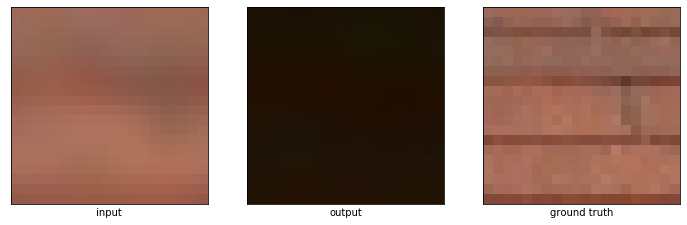

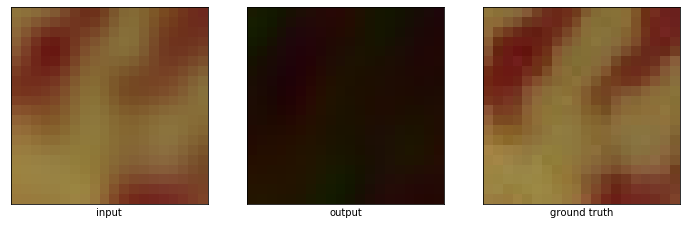

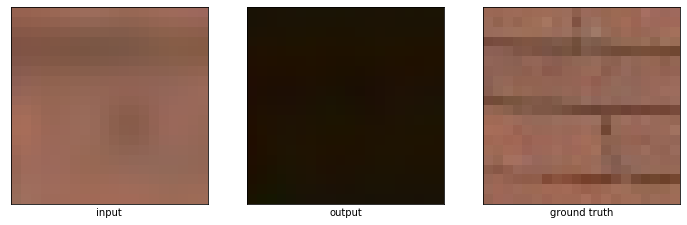

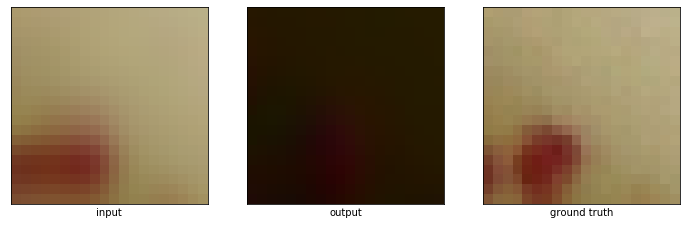

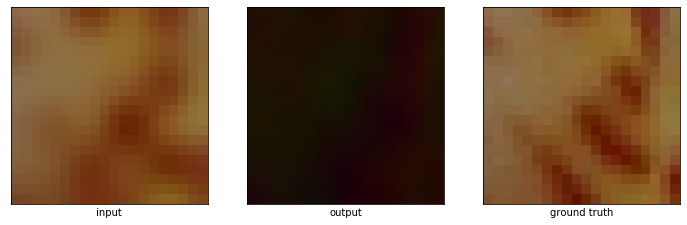

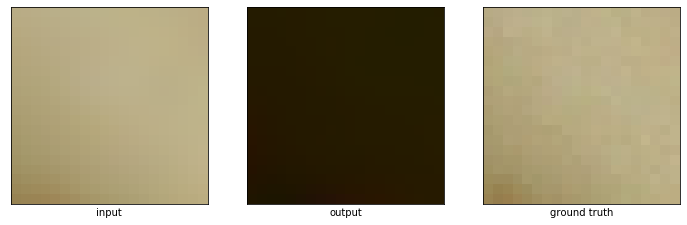

In [58]:
def plot_predictions_on_dataset(d, model, count):
    d_small = d.shuffle(100).take(count)
    
    names = []
    inputs = []
    ground_truth = []
    identity = lambda x, y: (x, y)
    for c, (i, g) in enumerate(d_small.map(identity)):
        names.append(f'patch {c}')
        inputs.append(i)
        ground_truth.append(g)
    
    psnr = plot_predictions(model, names, inputs, ground_truth)
    display(pd.DataFrame(psnr, columns=["Image Name", "PSNR: Input", "PSNR: SRCNN"]))
    

plot_predictions_on_dataset(dataset, model, 6)

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  15616     
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  2080      
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  2403      
Total params: 20,099
Trainable params: 20,099
Non-trainable params: 0
_________________________________________________________________


In [9]:
model_dir='models'
if not os.path.isdir(model_dir):
    os.mkdir(model_dir)
    
model_path = f"{model_dir}/{run_id}.h5"
model.save(model_path)

[['baby', '30.160', '30.359'], ['bird', '28.285', '28.772'], ['butterfly', '20.716', '21.881'], ['head', '28.525', '28.709'], ['woman', '25.091', '25.408']]


,Image Name,PSNR: Input,PSNR: SRCNN
0,baby,30.160,30.359
1,bird,28.285,28.772
2,butterfly,20.716,21.881
3,head,28.525,28.709
4,woman,25.091,25.408


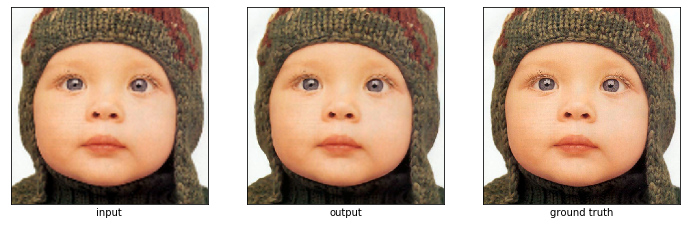

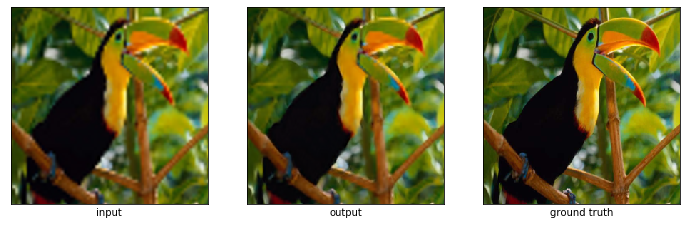

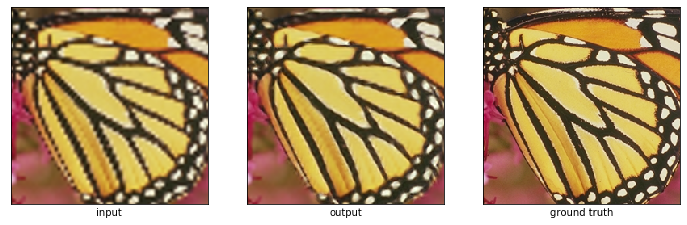

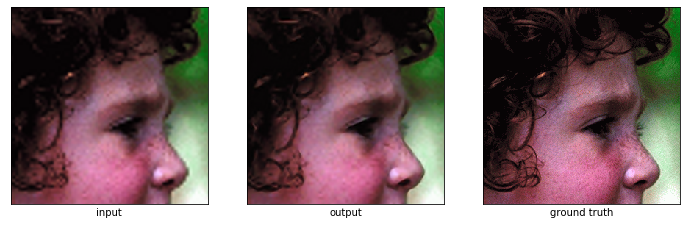

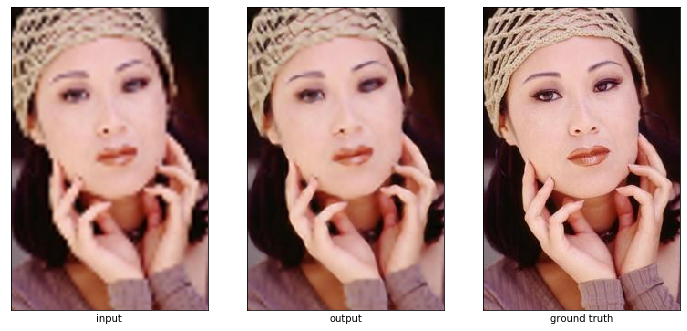

In [61]:
model_dir='models'
model_path = max(glob.iglob(os.path.join(model_dir, "*.h5")), key=os.path.getctime)
restored_model = tf.keras.models.load_model(model_path)
input_size = 32
output_size=20

psnr = []

for filename in tf.io.matching_files("datasets/Test/Set5/*.bmp"):
    image_string = tf.io.read_file(filename)
    image = tf.image.decode_bmp(image_string, channels=3)
    h, w, _ = image.get_shape()
    
    input = prepare_input_image(image, h, w, scale=4)
    
    padding = (input_size - output_size) // 2
    gt = prepare_output_image(image, h, w, h - 2*padding, w - 2*padding)
    
    short_name = os.path.split(f"{filename}")[1]
    last_index = short_name.find("_")
    short_name = short_name[:last_index]
    
    # can't use plot_predictions on all images since they have different sizes
    psnr = psnr + plot_predictions(restored_model, [short_name], [input], [gt])
    
print(psnr)
display(pd.DataFrame(psnr, columns=["Image Name", "PSNR: Input", "PSNR: SRCNN"]))